In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import scipy as imposp
from scipy import stats
import plotly.offline as po
import plotly.graph_objs as go
import dexplot as dxp
from numpy import median
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy import stats
import scipy as sp
from datetime import date

In [125]:
import pandas as pd
df=pd.read_csv('merged.csv', usecols=['livingAreaValue','zipcode','bathrooms','bedrooms',
'annualHomeownersInsurance','yearBuilt','resoFacts.yearBuiltEffective','price','monthlyHoaFee','solarPotential.sunScore',
'resoFacts.hasGarage','resoFacts.waterViewYN','resoFacts.architecturalStyle','resoFacts.daysOnZillow',
'resoFacts.bathroomsHalf','resoFacts.bathroomsFull','resoFacts.hasOpenParking','resoFacts.subdivisionName',
'resoFacts.hasView','resoFacts.hasAttachedGarage','resoFacts.propertyCondition','resoFacts.isNewConstruction',
'resoFacts.taxAnnualAmount','listed_by.rating_average','resoFacts.pricePerSquareFoot','walkScore.walkscore',
'transitScore.transit_score','mortgage','citylabel','State','schools'])

In [126]:
df['elementary school score']=df['schools'].str.split(',', expand=True)[1].str.split(':', expand=True)[1]

In [127]:
df['elementary school score'] = df['elementary school score'].replace(" None", 
np.median(pd.to_numeric(df['elementary school score'], errors='coerce')))

In [128]:
df["elementary school score"] = df["elementary school score"].fillna(value=df["elementary school score"].median())

In [129]:
#numerical
df['bathrooms'].fillna((df['bathrooms'].median()), inplace=True)
df['bedrooms'].fillna((df['bedrooms'].median()), inplace=True)
df['resoFacts.bathroomsFull'].fillna((df['resoFacts.bathroomsFull'].median()), inplace=True)
df['walkScore.walkscore'].fillna((df['walkScore.walkscore'].median()), inplace=True)
df['elementary school score']=df['elementary school score'].astype(int)
df['yearBuilt']=df['yearBuilt'].astype('Int64')
df['resoFacts.yearBuiltEffective']=df['resoFacts.yearBuiltEffective'].astype('Int64')
df['zipcode']=df['zipcode'].astype('int')

#bool to numerical
df['resoFacts.waterViewYN']=df['resoFacts.waterViewYN'].astype('bool').astype(int)
df['resoFacts.hasOpenParking']=df['resoFacts.hasOpenParking'].astype('bool').astype(int)
df['resoFacts.hasAttachedGarage']=df['resoFacts.hasAttachedGarage'].astype('bool').astype(int)
df['resoFacts.isNewConstruction']=df['resoFacts.isNewConstruction'].astype('bool').astype(int)
df['resoFacts.hasGarage']=df['resoFacts.hasGarage'].astype('int')
df['resoFacts.hasView']=df['resoFacts.hasView'].astype('int')

#categorical
df['schools'].fillna((df['schools'].fillna("Unknown")), inplace=True)
df['resoFacts.waterViewYN'].fillna((df['resoFacts.waterViewYN'].fillna("Unknown")), inplace=True)
df['resoFacts.architecturalStyle'].fillna((df['resoFacts.architecturalStyle'].fillna("Unknown")), inplace=True)
df['resoFacts.hasOpenParking'].fillna((df['resoFacts.hasOpenParking'].fillna("Unknown")), inplace=True)
df['resoFacts.subdivisionName'].fillna((df['resoFacts.subdivisionName'].fillna("Unknown")), inplace=True)
df['resoFacts.hasAttachedGarage'].fillna((df['resoFacts.hasAttachedGarage'].fillna("Unknown")), inplace=True)
df['resoFacts.propertyCondition'].fillna((df['resoFacts.propertyCondition'].fillna("Unknown")), inplace=True)
df['resoFacts.isNewConstruction'].fillna((df['resoFacts.isNewConstruction'].fillna("Unknown")), inplace=True)

In [130]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

livingAreaValue has 2842 null values
yearBuilt has 801 null values
resoFacts.yearBuiltEffective has 14017 null values
solarPotential.sunScore has 8824 null values
resoFacts.bathroomsHalf has 1293 null values
resoFacts.taxAnnualAmount has 6456 null values
listed_by.rating_average has 3584 null values
resoFacts.pricePerSquareFoot has 2900 null values
transitScore.transit_score has 3815 null values


In [131]:
pd.set_option('display.max_columns', None)
df.dtypes

livingAreaValue                 float64
zipcode                           int32
bathrooms                       float64
bedrooms                        float64
annualHomeownersInsurance         int64
yearBuilt                         Int64
resoFacts.yearBuiltEffective      Int64
price                             int64
monthlyHoaFee                   float64
solarPotential.sunScore         float64
resoFacts.hasGarage               int32
resoFacts.waterViewYN             int32
resoFacts.architecturalStyle     object
resoFacts.daysOnZillow            int64
resoFacts.bathroomsHalf         float64
resoFacts.bathroomsFull         float64
resoFacts.hasOpenParking          int32
resoFacts.subdivisionName        object
resoFacts.hasView                 int32
resoFacts.hasAttachedGarage       int32
resoFacts.propertyCondition      object
resoFacts.isNewConstruction       int32
resoFacts.taxAnnualAmount       float64
listed_by.rating_average        float64
schools                          object


In [132]:
df1=df[['resoFacts.architecturalStyle','resoFacts.subdivisionName','resoFacts.propertyCondition',
    'schools','citylabel','State']]
df.drop(columns=['resoFacts.architecturalStyle','resoFacts.subdivisionName','resoFacts.propertyCondition',
    'schools','citylabel','State'],inplace=True)

In [133]:
# Used KNN Inputer
#https://towardsdatascience.com/imputing-numerical-data-top-5-techniques-every-data-scientist-must-know-587c0f51552a
data_original = df

# Scaled dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_original)
data_scaled = pd.DataFrame(data=data_scaled, columns=data_original.columns)
data_scaled.head()

imputer_orig = KNNImputer(n_neighbors=5)
imputed_orig = imputer_orig.fit_transform(data_original)

imputer_scaled = KNNImputer(n_neighbors=5)
imputed_scaled = imputer_scaled.fit_transform(data_scaled)

# Convert to DataFrames
imputed_orig = pd.DataFrame(data=imputed_orig, columns=data_original.columns)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

# Inverse the scaling
imputed_scaled = scaler.inverse_transform(imputed_scaled)
df = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

In [134]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

In [135]:
df = pd.concat([df, df1], axis=1, join='inner')

In [136]:
df=df[df['price']<=5995000]

In [137]:
df.drop(columns=['schools'], inplace=True)

In [138]:
df.shape

(13920, 31)

In [140]:
df2=pd.read_csv('uszips.csv')
df2['zipcode']=df2['zip']
df['zipcode']=df['zipcode'].astype('int')
df3 = pd.merge(df, df2, how='left', on=['zipcode'])

In [141]:
df3.drop(columns=['zip','parent_zcta','cbsa_fips','cbsa_name','cbsa_metro','csa_fips','csa_name',
                  'city','state_id','state_name','zcta',
                  'state_id','state_name','county_fips','county_name','county_weights','county_names_all',
                  'county_fips_all','imprecise','military','timezone',
                  'self_employed','charitable_givers',
                  'city','zcta',
                  'home_value','rent_median','rent_burden',
                  'lat','lng'
],inplace=True)

In [143]:
for column in df3:
    if df3[column].isnull().any():
       print('{0} has {1} null values'.format(column, df3[column].isnull().sum()))

population has 576 null values
density has 576 null values
age_median has 692 null values
age_under_10 has 692 null values
age_10_to_19 has 692 null values
age_20s has 692 null values
age_30s has 692 null values
age_40s has 692 null values
age_50s has 692 null values
age_60s has 692 null values
age_70s has 692 null values
age_over_80 has 692 null values
male has 692 null values
female has 692 null values
married has 692 null values
divorced has 692 null values
never_married has 692 null values
widowed has 692 null values
family_size has 692 null values
family_dual_income has 692 null values
income_household_median has 693 null values
income_household_under_5 has 692 null values
income_household_5_to_10 has 692 null values
income_household_10_to_15 has 692 null values
income_household_15_to_20 has 692 null values
income_household_20_to_25 has 692 null values
income_household_25_to_35 has 692 null values
income_household_35_to_50 has 692 null values
income_household_50_to_75 has 692 null

In [144]:
df3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13920 entries, 0 to 13919
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   livingAreaValue               13920 non-null  float64
 1   zipcode                       13920 non-null  int32  
 2   bathrooms                     13920 non-null  float64
 3   bedrooms                      13920 non-null  float64
 4   annualHomeownersInsurance     13920 non-null  float64
 5   yearBuilt                     13920 non-null  float64
 6   resoFacts.yearBuiltEffective  13920 non-null  float64
 7   price                         13920 non-null  float64
 8   monthlyHoaFee                 13920 non-null  float64
 9   solarPotential.sunScore       13920 non-null  float64
 10  resoFacts.hasGarage           13920 non-null  float64
 11  resoFacts.waterViewYN         13920 non-null  float64
 12  resoFacts.daysOnZillow        13920 non-null  float64
 13  r

In [145]:
#df4 stores categorical variables
df4=df3[['resoFacts.architecturalStyle','resoFacts.subdivisionName','resoFacts.propertyCondition','citylabel','State']]
df3.drop(columns=['resoFacts.architecturalStyle','resoFacts.subdivisionName','resoFacts.propertyCondition',
    'citylabel','State'],inplace=True)

In [146]:
# Used KNN Inputer
#https://towardsdatascience.com/imputing-numerical-data-top-5-techniques-every-data-scientist-must-know-587c0f51552a
data_original = df3

# Scaled dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_original)
data_scaled = pd.DataFrame(data=data_scaled, columns=data_original.columns)
data_scaled.head()

imputer_orig = KNNImputer(n_neighbors=5)
imputed_orig = imputer_orig.fit_transform(data_original)

imputer_scaled = KNNImputer(n_neighbors=5)
imputed_scaled = imputer_scaled.fit_transform(data_scaled)

# Convert to DataFrames
imputed_orig = pd.DataFrame(data=imputed_orig, columns=data_original.columns)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

# Inverse the scaling
imputed_scaled = scaler.inverse_transform(imputed_scaled)
df3 = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

In [147]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

In [148]:
df5 = pd.concat([df3, df4], axis=1, join='inner')
df5.shape

(13920, 90)

In [149]:
df=df5.drop(['resoFacts.architecturalStyle',
              'resoFacts.subdivisionName','resoFacts.propertyCondition','State',
           'resoFacts.pricePerSquareFoot','mortgage','annualHomeownersInsurance',
           'resoFacts.yearBuiltEffective','resoFacts.hasView','resoFacts.hasGarage',
           'resoFacts.hasOpenParking','resoFacts.daysOnZillow',
           'family_size','disabled','veteran','age_median','zipcode',
           'income_household_under_5','income_household_5_to_10','income_household_10_to_15',
           'income_household_15_to_20','income_household_20_to_25','income_household_25_to_35',
           'income_household_35_to_50','income_individual_median','population','income_household_six_figure',
           'farmer','health_uninsured','race_native','family_dual_income','unemployment_rate'
             ], axis=1)

In [150]:
df["Water View (Y/N)"] = df["resoFacts.waterViewYN"]
df['Bedrooms']=df['bedrooms']
df['Bathrooms']=df['bathrooms']
df['Attached Garage (Y/N)']=df['resoFacts.hasAttachedGarage']
df['Elementary School Score']=df['elementary school score']

In [151]:
df.head()

livingAreaValue  bathrooms  bedrooms  yearBuilt     price  monthlyHoaFee  \
0            943.0        2.0       2.0     1900.0  275000.0          148.0   
1           1230.0        2.0       2.0     1960.0  105000.0          893.0   
2            746.0        1.0       1.0     1900.0  275000.0          253.0   
3            799.0        1.0       1.0     1880.0  289000.0          465.0   
4            660.0        1.0       1.0     1900.0  260000.0          213.0   

   solarPotential.sunScore  resoFacts.waterViewYN  resoFacts.bathroomsHalf  \
0                   88.830                    0.0                      0.4   
1                   66.460                    0.0                      1.0   
2                   93.630                    0.0                      0.4   
3                   91.890                    0.0                      0.4   
4                   87.008                    0.0                      0.4   

   resoFacts.bathroomsFull  resoFacts.hasAttachedGarage  \
0                      2.0                          0.0   
1                      1.0                          0.0   
2                      1.0                          0.0   
3                      1.0                          0.0   
4                      1.0                          0.0   

   resoFacts.isNewConstruction  resoFacts.taxAnnualAmount  \
0                          0.0                     3202.0   
1                          0.0                     1304.0   
2                          0.0                     4213.0   
3                          0.0                     3825.0   
4                          0.0                      722.0   

   listed_by.rating_average  walkScore.walkscore  transitScore.transit_score  \
0                       5.0                 96.0                        78.0   
1                       4.6                 48.0                        46.0   
2                       4.9                 99.0                       100.0   
3                       5.0                 98.0                        94.0   
4                       0.0                 99.0                       100.0   

   elementary school score  density  age_under_10  age_10_to_19  age_20s  \
0                      2.0   8082.5           7.0           3.3     27.1   
1                      2.0   3272.2          12.4          13.8     16.0   
2                      7.0  14630.6           4.0           2.6     26.7   
3                      7.0   6052.4           5.0           2.0     25.0   
4                      7.0   6052.4           5.0           2.0     25.0   

   age_30s  age_40s  age_50s  age_60s  age_70s  age_over_80  male  female  \
0     24.2     10.2     10.0      9.5      5.5          3.0  48.4    51.6   
1     12.2     10.0     12.7     10.7      6.8          5.2  44.5    55.5   
2     21.6      8.0     10.5     12.0      8.4          6.2  43.3    56.7   
3     19.7     11.8     11.5     12.0      7.6          5.3  49.5    50.5   
4     19.7     11.8     11.5     12.0      7.6          5.3  49.5    50.5   

   married  divorced  never_married  widowed  income_household_median  \
0     35.8       9.2           51.3      3.8                  84308.0   
1     21.5      15.0           55.6      7.8                  37345.0   
2     33.9       9.3           51.2      5.6                  76103.0   
3     38.0      12.0           46.1      3.9                 107388.0   
4     38.0      12.0           46.1      3.9                 107388.0   

   income_household_50_to_75  income_household_75_to_100  \
0                       16.6                        14.4   
1                       14.9                        10.5   
2                       16.5                        11.3   
3                       16.7                        11.8   
4                       16.7                        11.8   

   income_household_100_to_150  income_household_150_over  home_ownership  \
0                         18.5                       24.8  

In [114]:
x_list=["Water View (Y/N)","Bedrooms","Bathrooms",'Attached Garage (Y/N)','Elementary School Score']

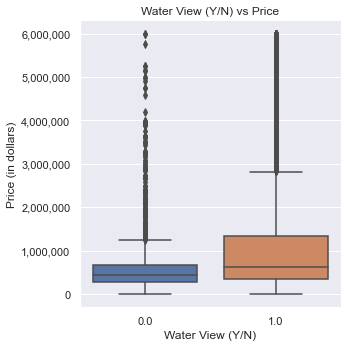

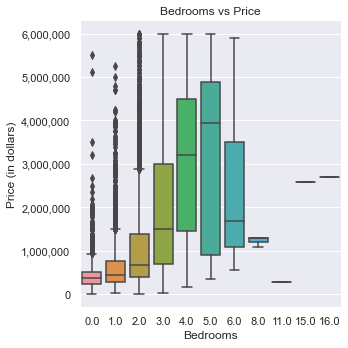

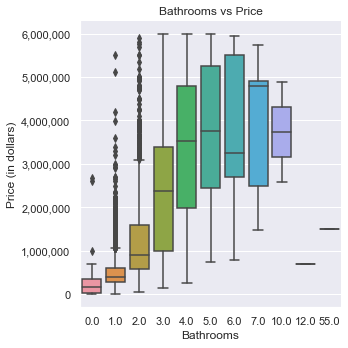

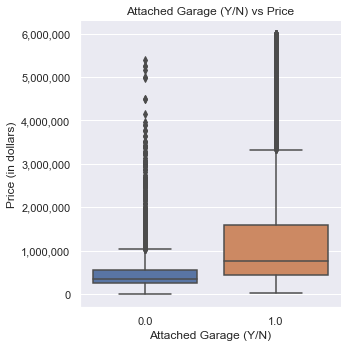

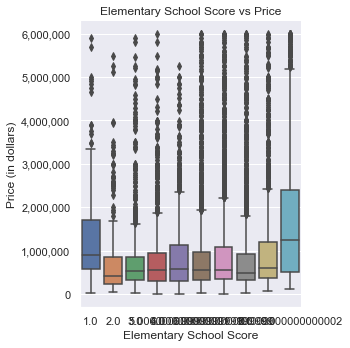

In [115]:
#box and whiskerplot
#drop price above 95 percentile for EDA
for x in x_list:
    fg=sns.catplot(data=df,x=x,y='price',kind='box')
    sns.set()
    for ax in fg.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")

    plt.tight_layout()
#So that axis show
    plt.show()

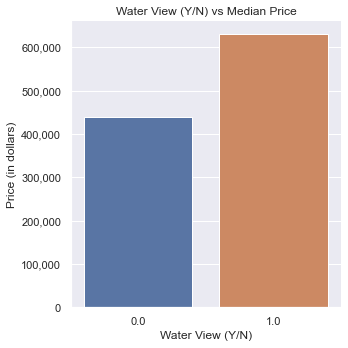

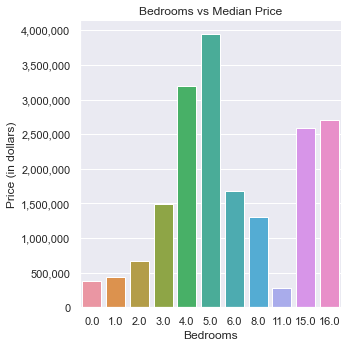

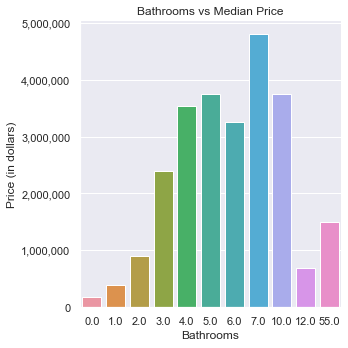

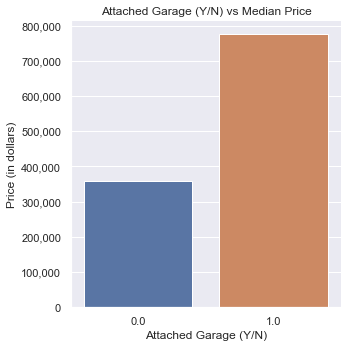

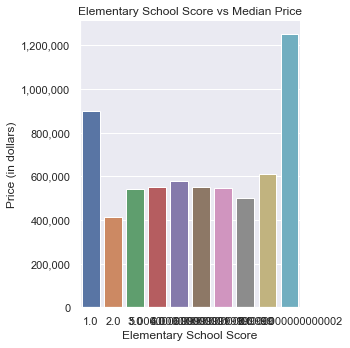

In [116]:
#bar chart
for x in x_list:
    fg=sns.catplot(data=df,x=x,y='price',kind='bar',estimator=np.median,ci=False)
    sns.set()
    for ax in fg.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title(str(x)+' vs Median Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")

    plt.tight_layout()
#So that axis show
    plt.show()

In [152]:
df.head()

livingAreaValue  bathrooms  bedrooms  yearBuilt     price  monthlyHoaFee  \
0            943.0        2.0       2.0     1900.0  275000.0          148.0   
1           1230.0        2.0       2.0     1960.0  105000.0          893.0   
2            746.0        1.0       1.0     1900.0  275000.0          253.0   
3            799.0        1.0       1.0     1880.0  289000.0          465.0   
4            660.0        1.0       1.0     1900.0  260000.0          213.0   

   solarPotential.sunScore  resoFacts.waterViewYN  resoFacts.bathroomsHalf  \
0                   88.830                    0.0                      0.4   
1                   66.460                    0.0                      1.0   
2                   93.630                    0.0                      0.4   
3                   91.890                    0.0                      0.4   
4                   87.008                    0.0                      0.4   

   resoFacts.bathroomsFull  resoFacts.hasAttachedGarage  \
0                      2.0                          0.0   
1                      1.0                          0.0   
2                      1.0                          0.0   
3                      1.0                          0.0   
4                      1.0                          0.0   

   resoFacts.isNewConstruction  resoFacts.taxAnnualAmount  \
0                          0.0                     3202.0   
1                          0.0                     1304.0   
2                          0.0                     4213.0   
3                          0.0                     3825.0   
4                          0.0                      722.0   

   listed_by.rating_average  walkScore.walkscore  transitScore.transit_score  \
0                       5.0                 96.0                        78.0   
1                       4.6                 48.0                        46.0   
2                       4.9                 99.0                       100.0   
3                       5.0                 98.0                        94.0   
4                       0.0                 99.0                       100.0   

   elementary school score  density  age_under_10  age_10_to_19  age_20s  \
0                      2.0   8082.5           7.0           3.3     27.1   
1                      2.0   3272.2          12.4          13.8     16.0   
2                      7.0  14630.6           4.0           2.6     26.7   
3                      7.0   6052.4           5.0           2.0     25.0   
4                      7.0   6052.4           5.0           2.0     25.0   

   age_30s  age_40s  age_50s  age_60s  age_70s  age_over_80  male  female  \
0     24.2     10.2     10.0      9.5      5.5          3.0  48.4    51.6   
1     12.2     10.0     12.7     10.7      6.8          5.2  44.5    55.5   
2     21.6      8.0     10.5     12.0      8.4          6.2  43.3    56.7   
3     19.7     11.8     11.5     12.0      7.6          5.3  49.5    50.5   
4     19.7     11.8     11.5     12.0      7.6          5.3  49.5    50.5   

   married  divorced  never_married  widowed  income_household_median  \
0     35.8       9.2           51.3      3.8                  84308.0   
1     21.5      15.0           55.6      7.8                  37345.0   
2     33.9       9.3           51.2      5.6                  76103.0   
3     38.0      12.0           46.1      3.9                 107388.0   
4     38.0      12.0           46.1      3.9                 107388.0   

   income_household_50_to_75  income_household_75_to_100  \
0                       16.6                        14.4   
1                       14.9                        10.5   
2                       16.5                        11.3   
3                       16.7                        11.8   
4                       16.7                        11.8   

   income_household_100_to_150  income_household_150_over  home_ownership  \
0                         18.5                       24.8  

In [122]:
#Add scatterplot for numerical visualizations


In [157]:
#formatting columns for Loop to format labels
df['Sun Score'] = df['solarPotential.sunScore']
df["Square Footage"] = df["livingAreaValue"]
df["Bathrooms"] = df['bathrooms']
df['Bedrooms']=df['bedrooms']
df['Monthly HOA Fee']=df['monthlyHoaFee']
df['Walk Score']=df['walkScore.walkscore']
df['Transit Score']=df['transitScore.transit_score']
df['Annual Tax Amount']=df['resoFacts.taxAnnualAmount']
df['Rating Average']=df['listed_by.rating_average']
df['Population Density']=df['density']
df['Median Household Income']=df['income_household_median']
df['Commute Time']=df['commute_time']

In [158]:
numerical=['Sun Score','Square Footage','Bathrooms','Bedrooms',
           'Monthly HOA Fee','Walk Score','Transit Score',
          'Rating Average','Elementary School Score',
          'Population Density','Median Household Income','Commute Time']

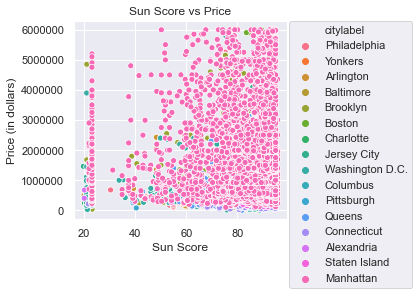

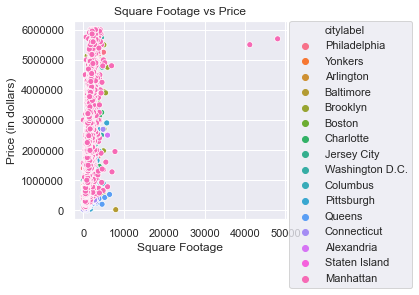

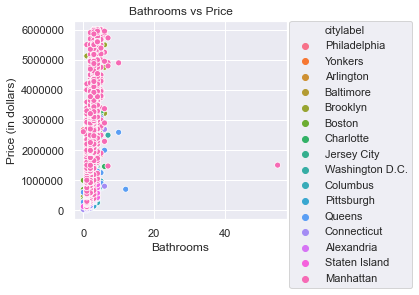

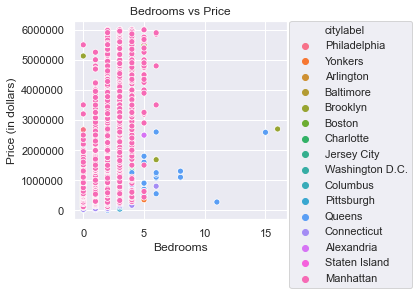

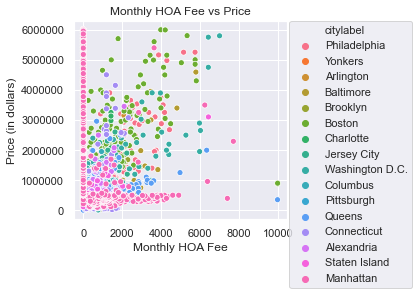

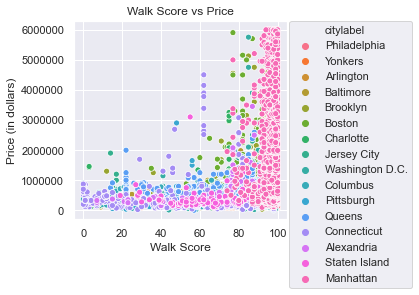

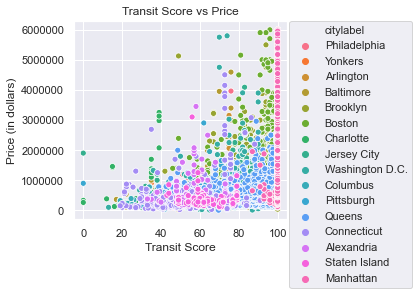

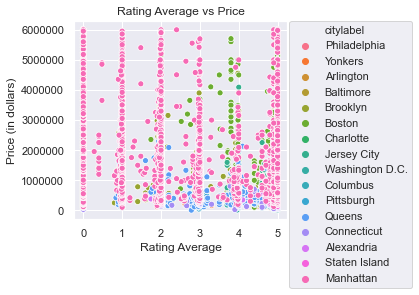

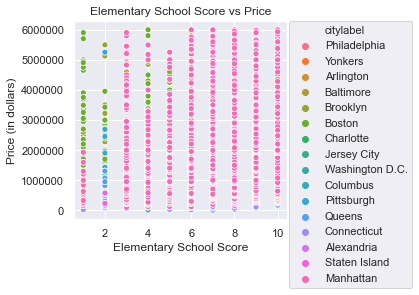

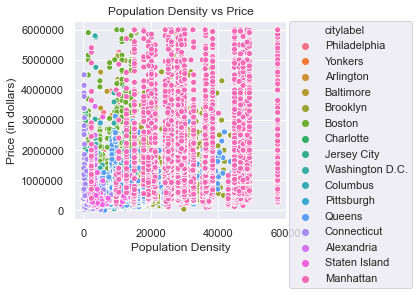

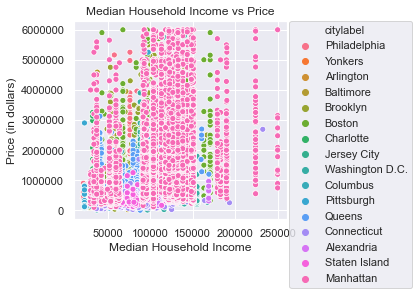

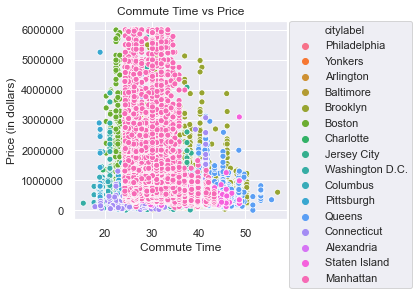

In [159]:
#scatter plot for numerical variables
#format the axes if using this plot
for x in numerical:
    sns.scatterplot(data=df, x=x, y='price',hue='citylabel')
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")
    plt.tight_layout()
#So that axis show
    plt.show()

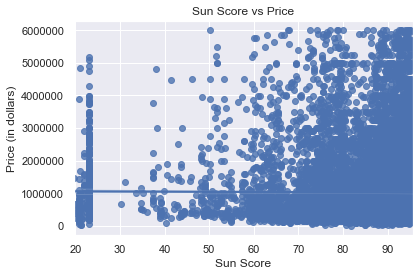

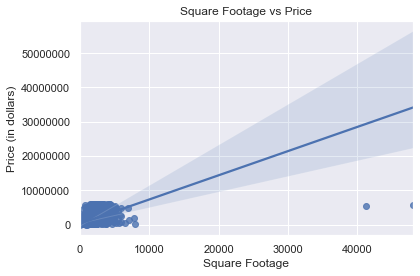

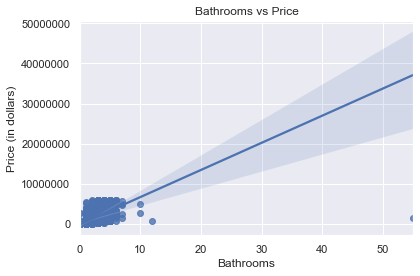

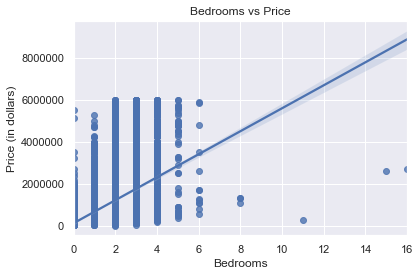

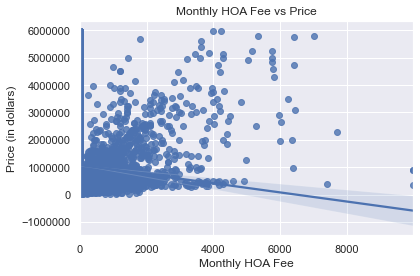

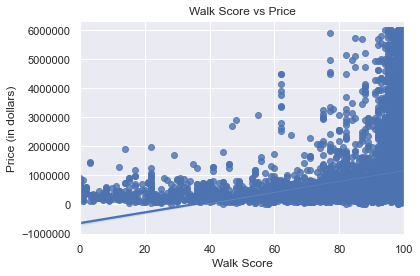

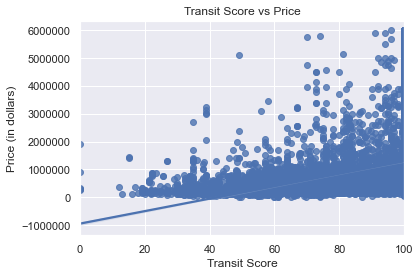

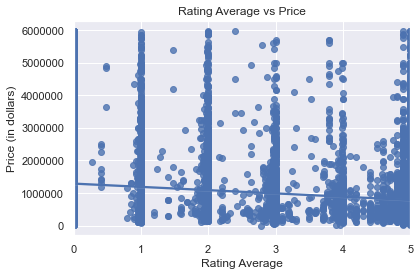

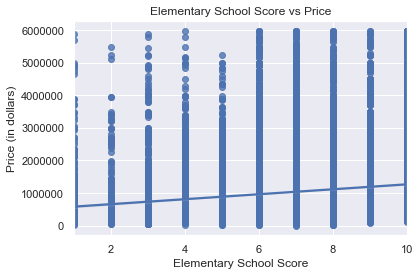

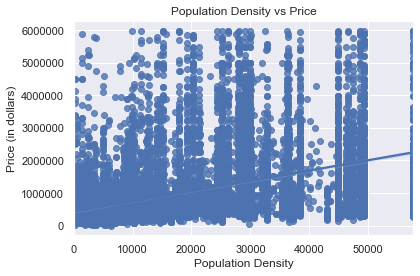

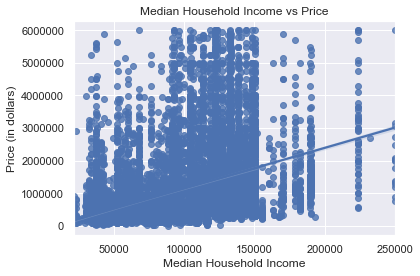

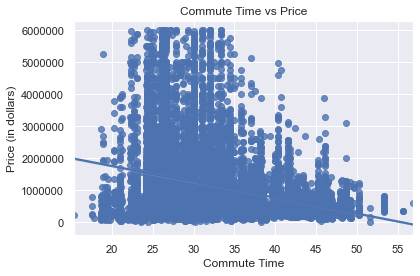

In [160]:
#regplot for numerical variables
for x in numerical:
    sns.regplot(data=df, x=x, y='price')
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")
    plt.tight_layout()
#So that axis show
    plt.show()

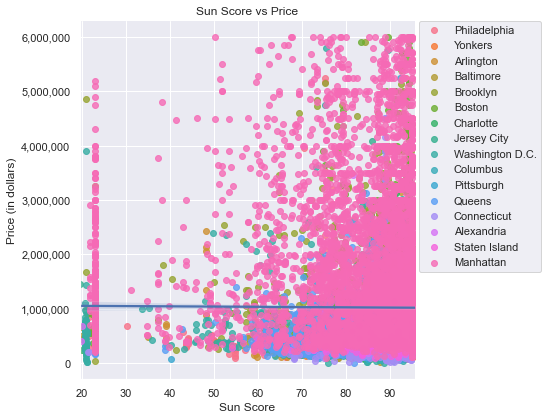

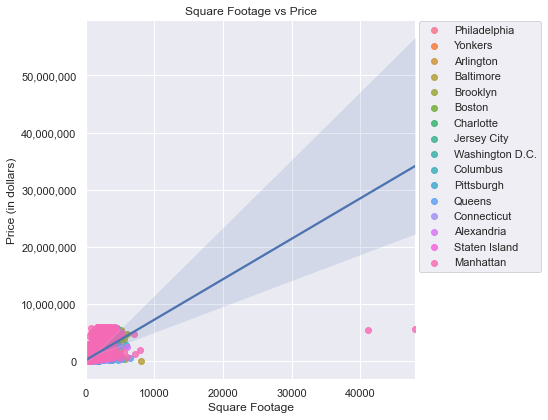

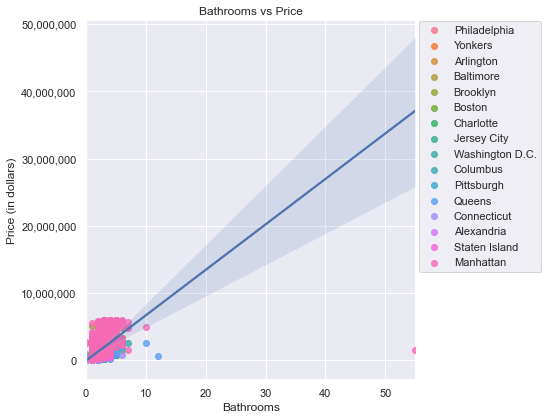

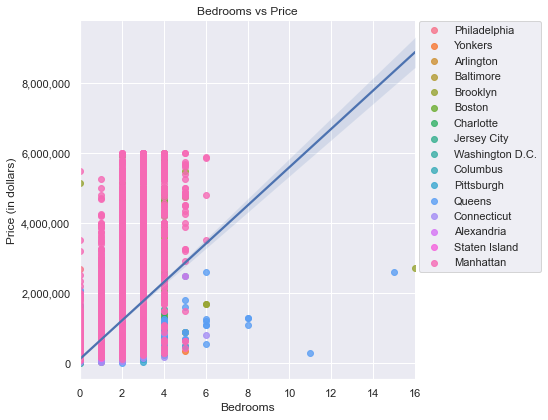

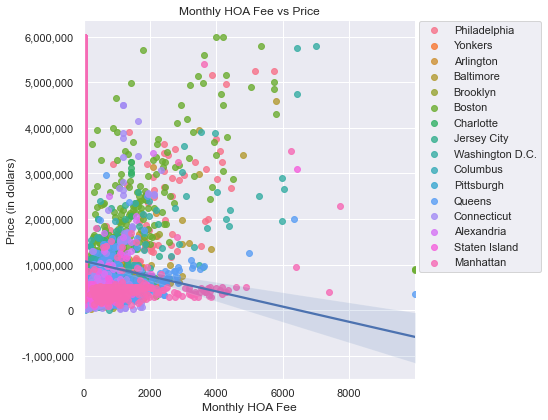

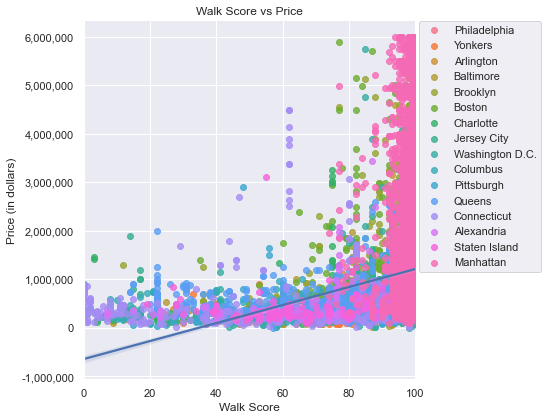

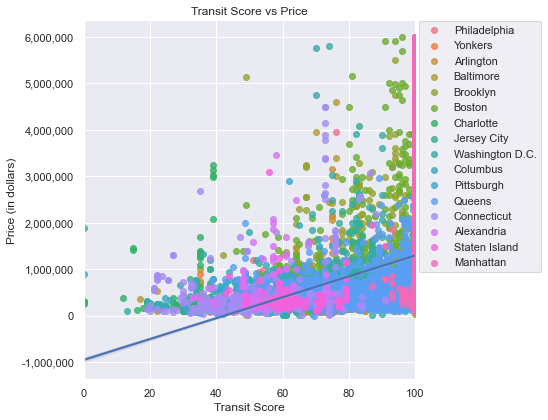

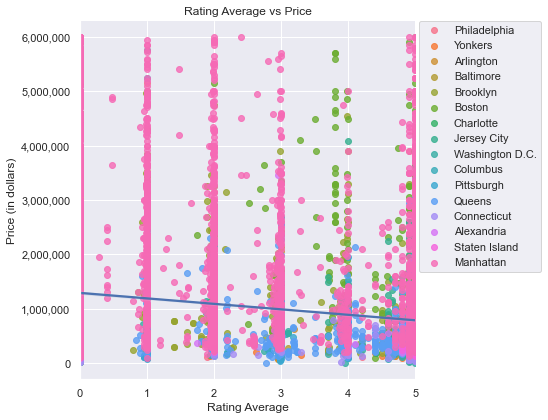

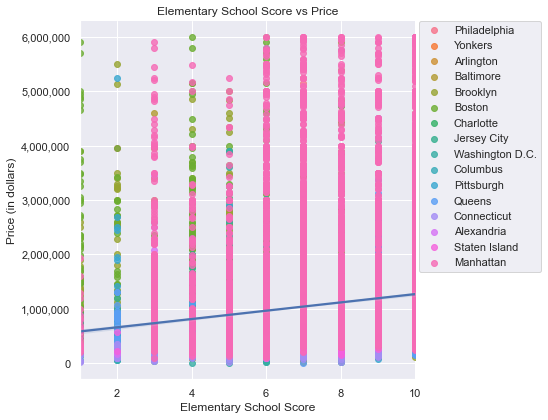

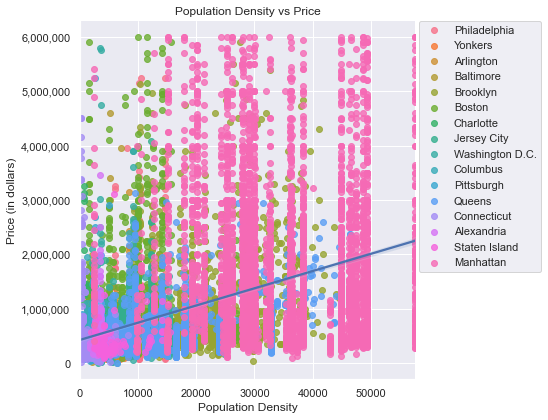

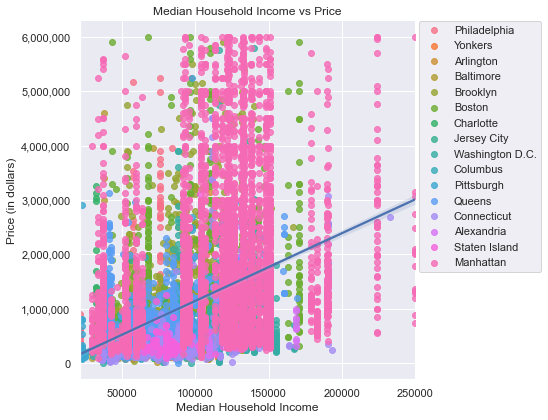

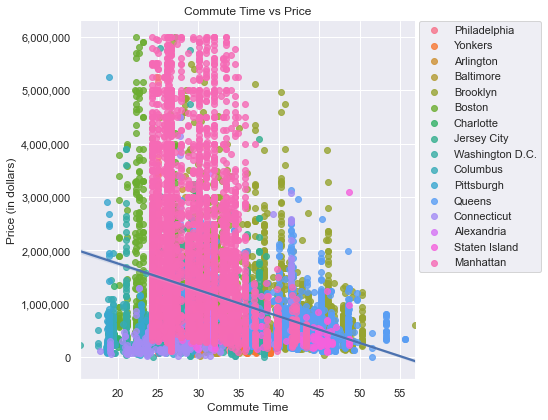

In [161]:
#lmplot for numerical variables but does not have regression coefficient
import seaborn as sns
for x in numerical:
    graph = sns.lmplot(data=df, x=x, y='price',hue='citylabel', fit_reg=False, legend=False,
                      height=6, aspect=1.3)
#Use regplot to plot the regression line for the whole points
    for ax in graph.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
    sns.regplot(x=x, y='price', data=df, scatter=False, ax=graph.axes[0, 0])
    
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")
    plt.tight_layout()
#So that axis show
    plt.show()

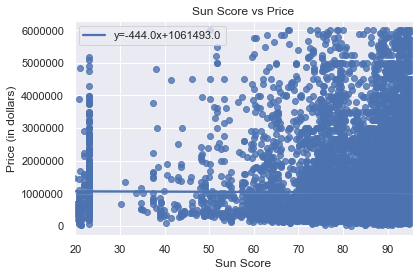

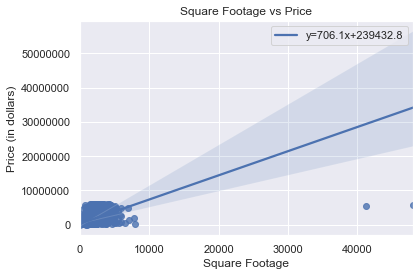

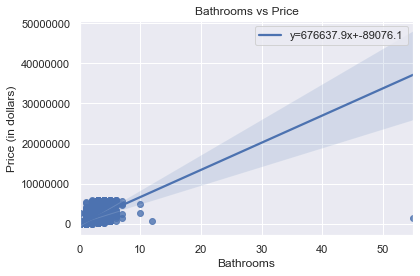

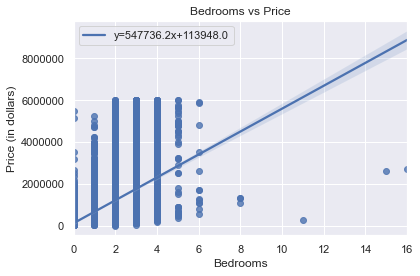

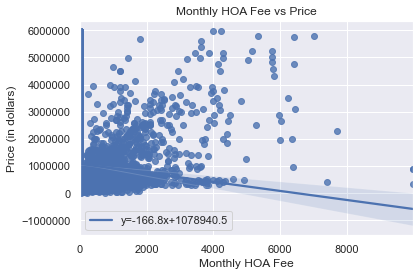

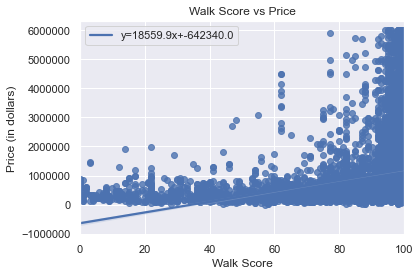

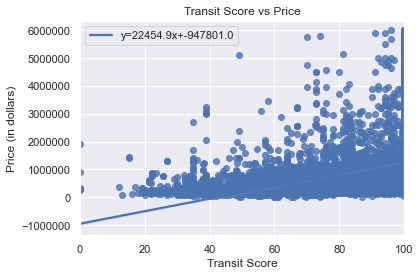

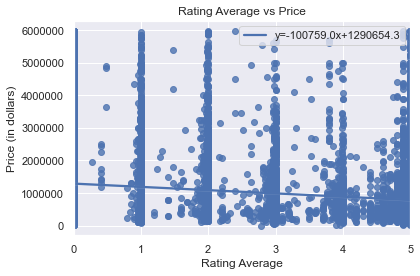

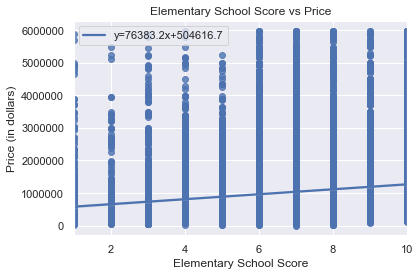

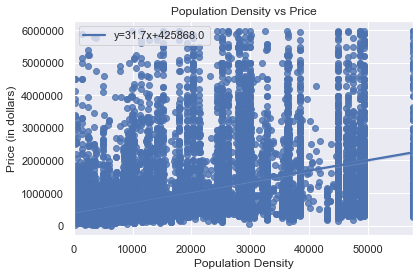

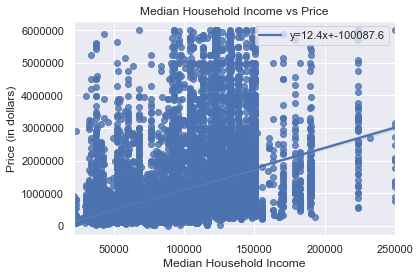

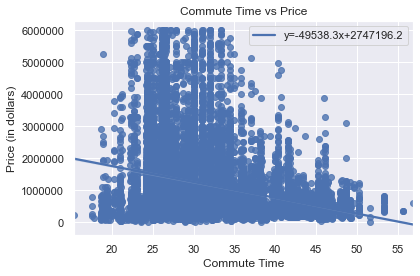

In [162]:
#regplot with regression coefficient
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

for x in numerical:
# get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df['price'])

# use line_kws to set line label for legend
    ax = sns.regplot(x=x, y="price", data=df, color='b', 
    line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plot legend
    plt.ticklabel_format(style='plain', axis='y')
    ax.legend()
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")
    plt.tight_layout()
    plt.show()

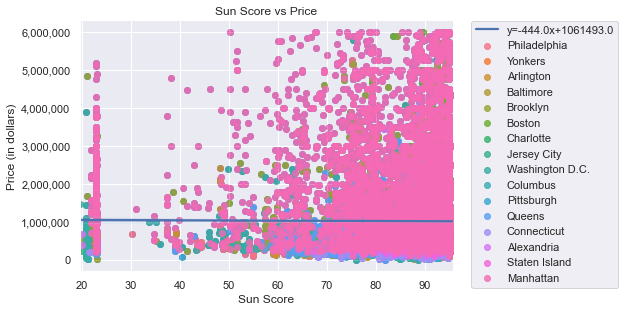

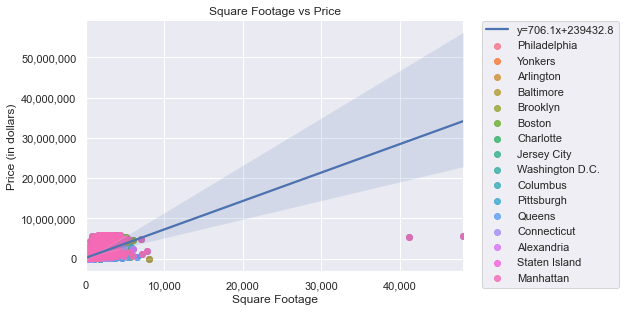

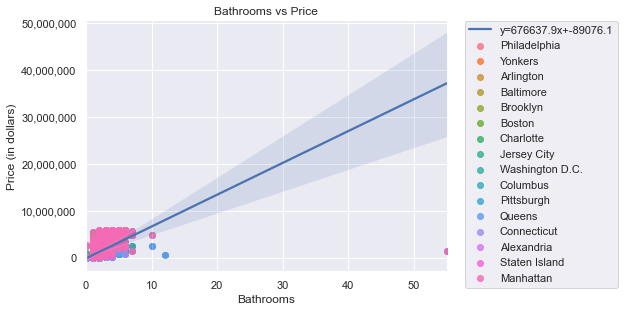

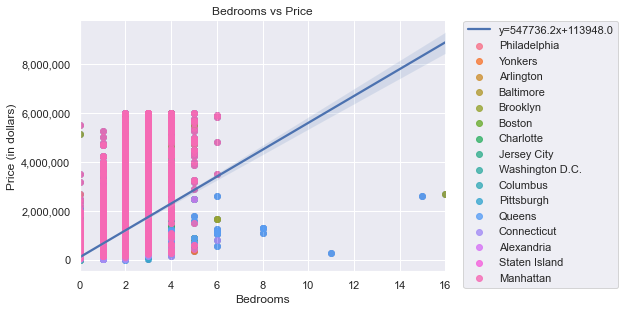

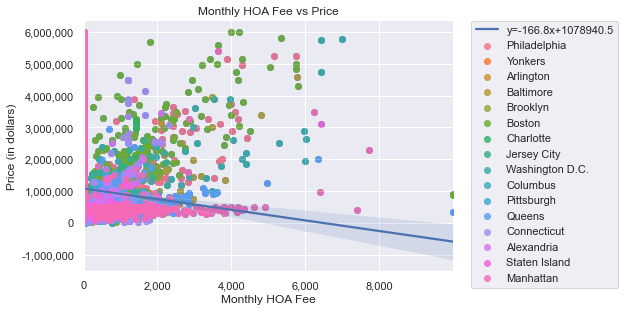

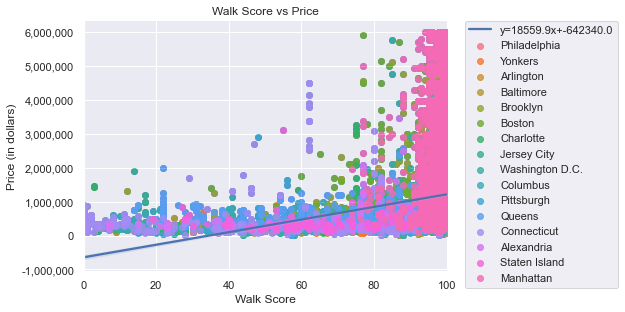

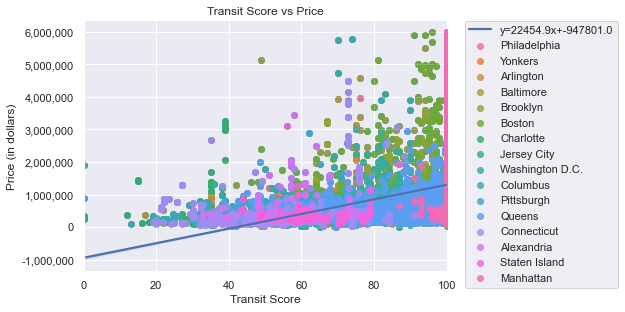

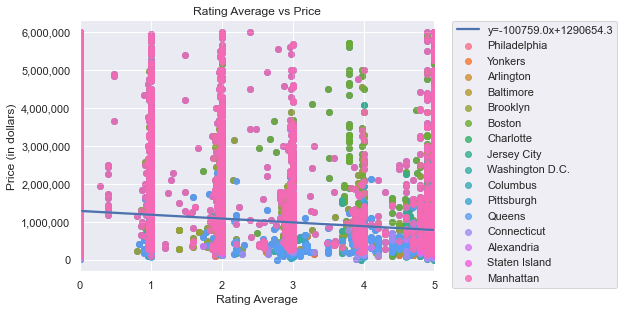

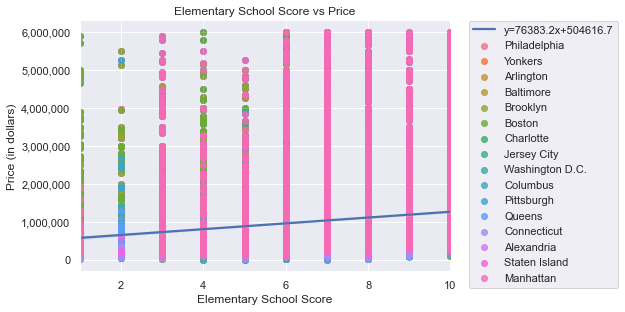

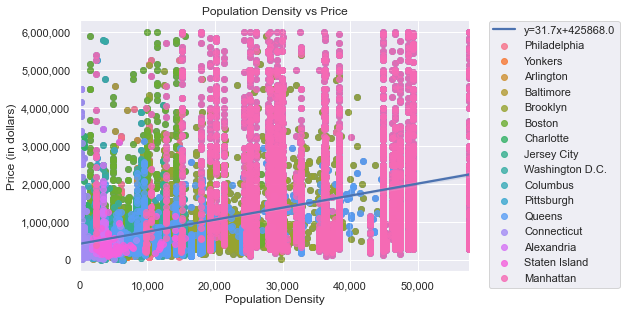

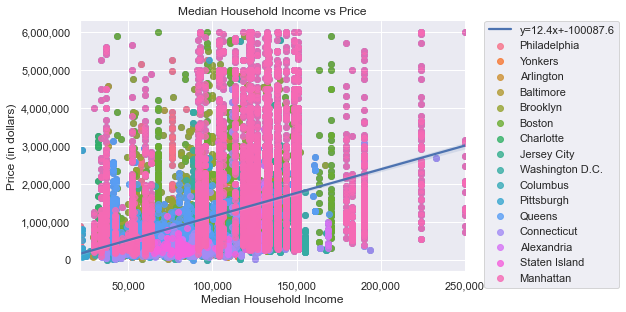

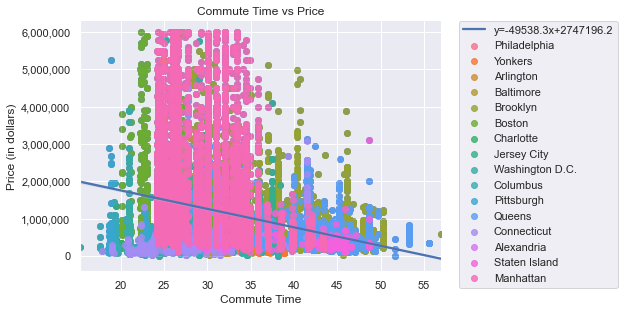

In [163]:
import seaborn as sns
from scipy import stats
import scipy as sp

for x in numerical:

# get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df['price'])

# Use lmplot to plot scatter points
    graph= sns.lmplot(x=x, y="price", hue='citylabel', 
                      data=df, fit_reg=False, legend=False,height=4.5, aspect=2)
    for ax in graph.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
    
# Use regplot to plot the regression line and use line_kws to set line label for legend
    ax = sns.regplot(x=x, y="price", data=df, scatter_kws={"zorder":-1},
    line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")
    plt.tight_layout()
    plt.show()

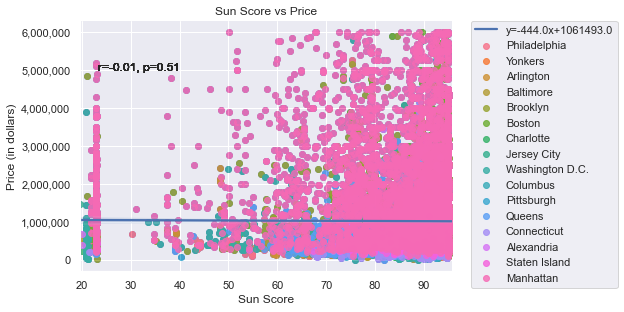

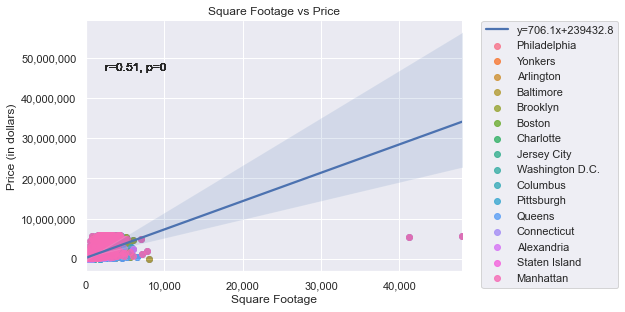

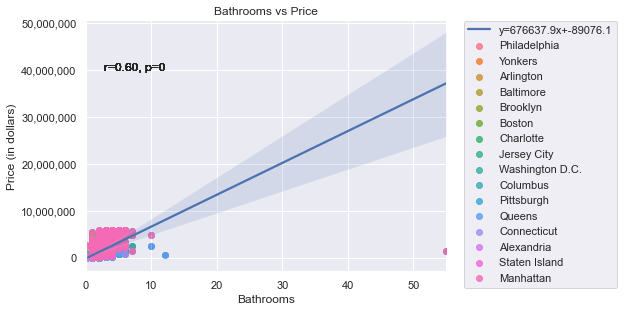

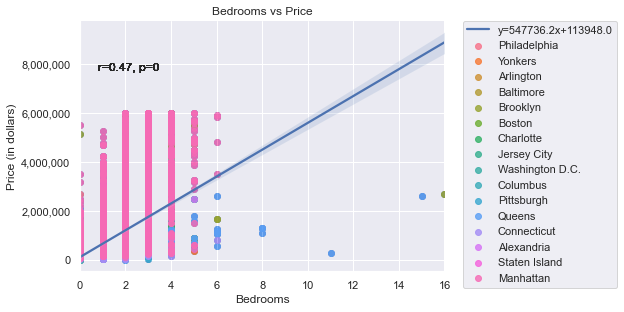

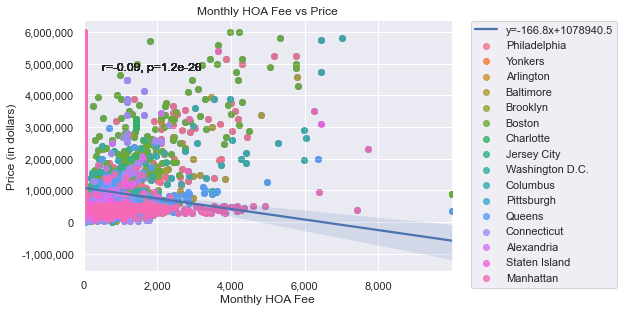

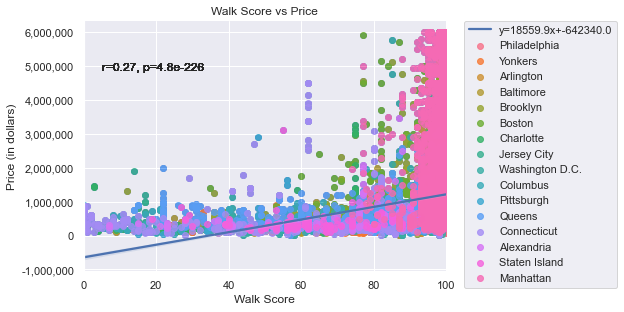

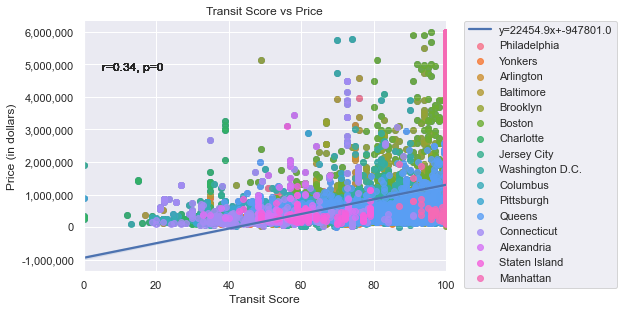

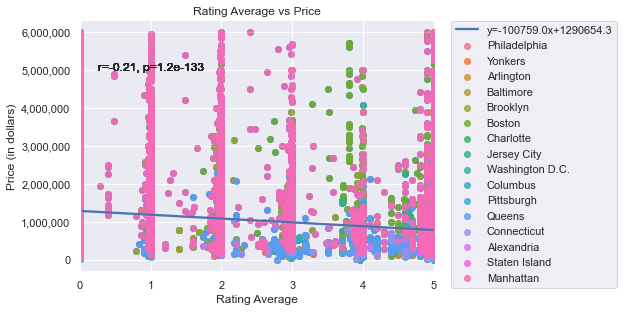

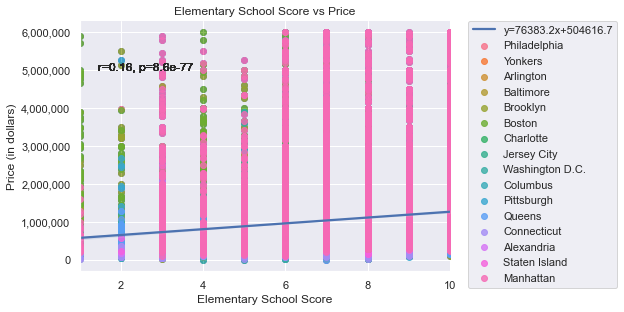

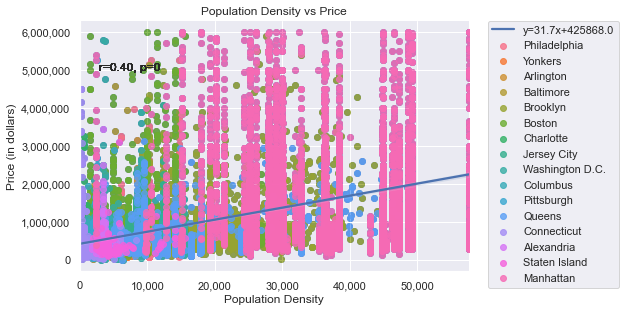

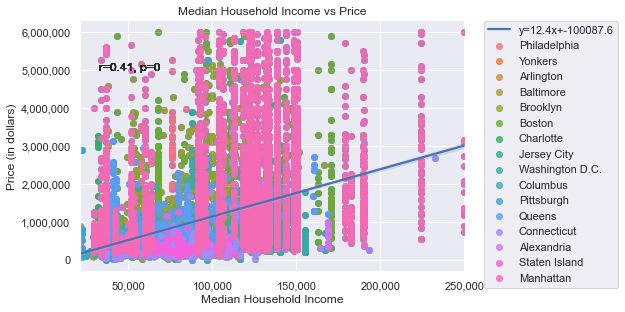

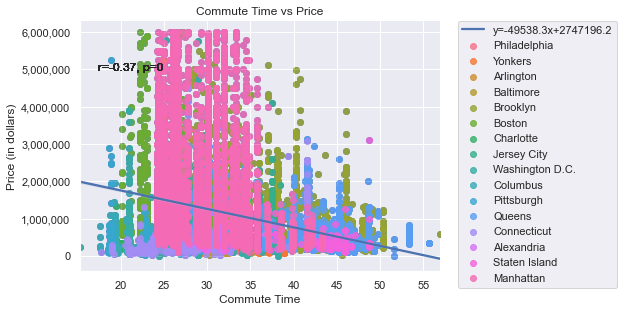

In [164]:
#lmplot with regression line. Should I calc the r2 instead of r?
#can not get regression without imputing the nans in numerical.

for x in numerical:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df['price'])
        
    graph = sns.lmplot(x=x, y='price', hue='citylabel',
                       data=df, fit_reg=False, legend=False,height=4.5, aspect=2)
    def annotate(data, **kws):
        r, p = sp.stats.pearsonr(df[x], df['price'])
        ax = plt.gca()
        ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
        transform=ax.transAxes)
    graph.map_dataframe(annotate)
            
    for ax in graph.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
      
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

    ax = sns.regplot(x=x, y="price", data=df, scatter_kws={"zorder":-1},
    line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")
    plt.tight_layout()
    plt.show()


In [174]:
numerical=[
    "Water View (Y/N)",'Attached Garage (Y/N)','Elementary School Score',   
'Walk Score','Transit Score','Monthly HOA Fee',       
'Population Density','Median Household Income','Commute Time',
 'Square Footage','Bathrooms','Bedrooms','price']

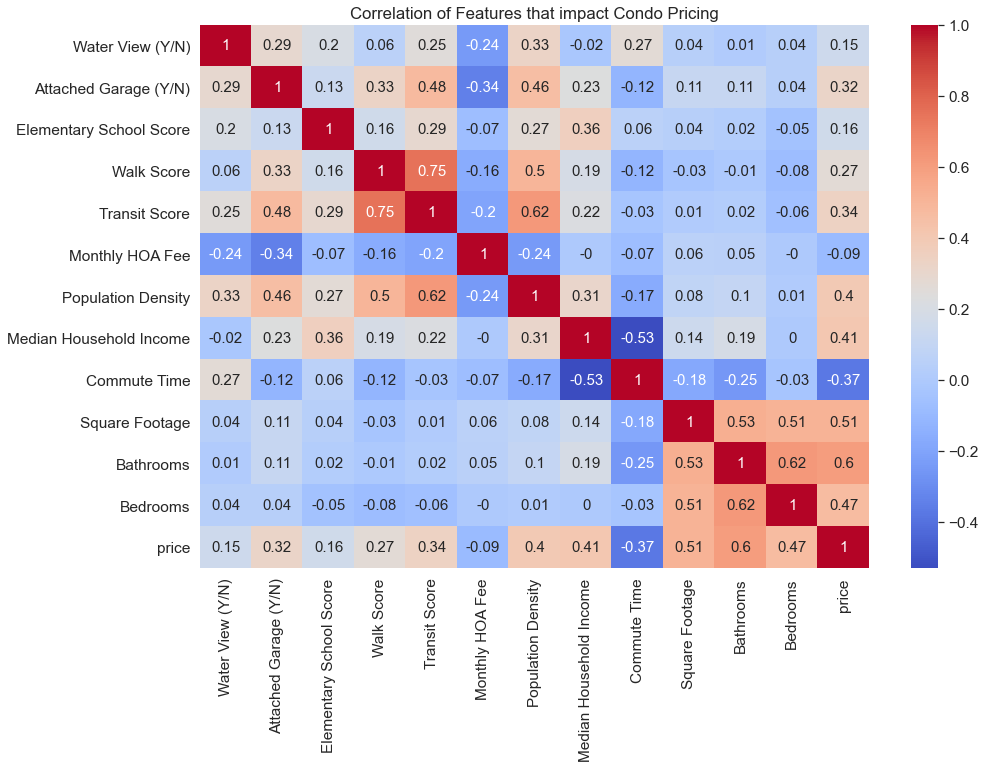

In [175]:
#walkscore and transit score are correlated
#2 color scale - blue negative red positive
plt.figure(figsize = (15,10))
cormap = df[numerical].corr()
cormap=round(cormap,2)
sns.set(font_scale=1.4)
sns.heatmap(cormap, cmap='coolwarm', annot=True, annot_kws={"size":15})
plt.title('Correlation of Features that impact Condo Pricing')
plt.show()

In [201]:
numerical=['Walk Score','Transit Score','Monthly HOA Fee',
          'Population Density','Median Household Income','Commute Time']

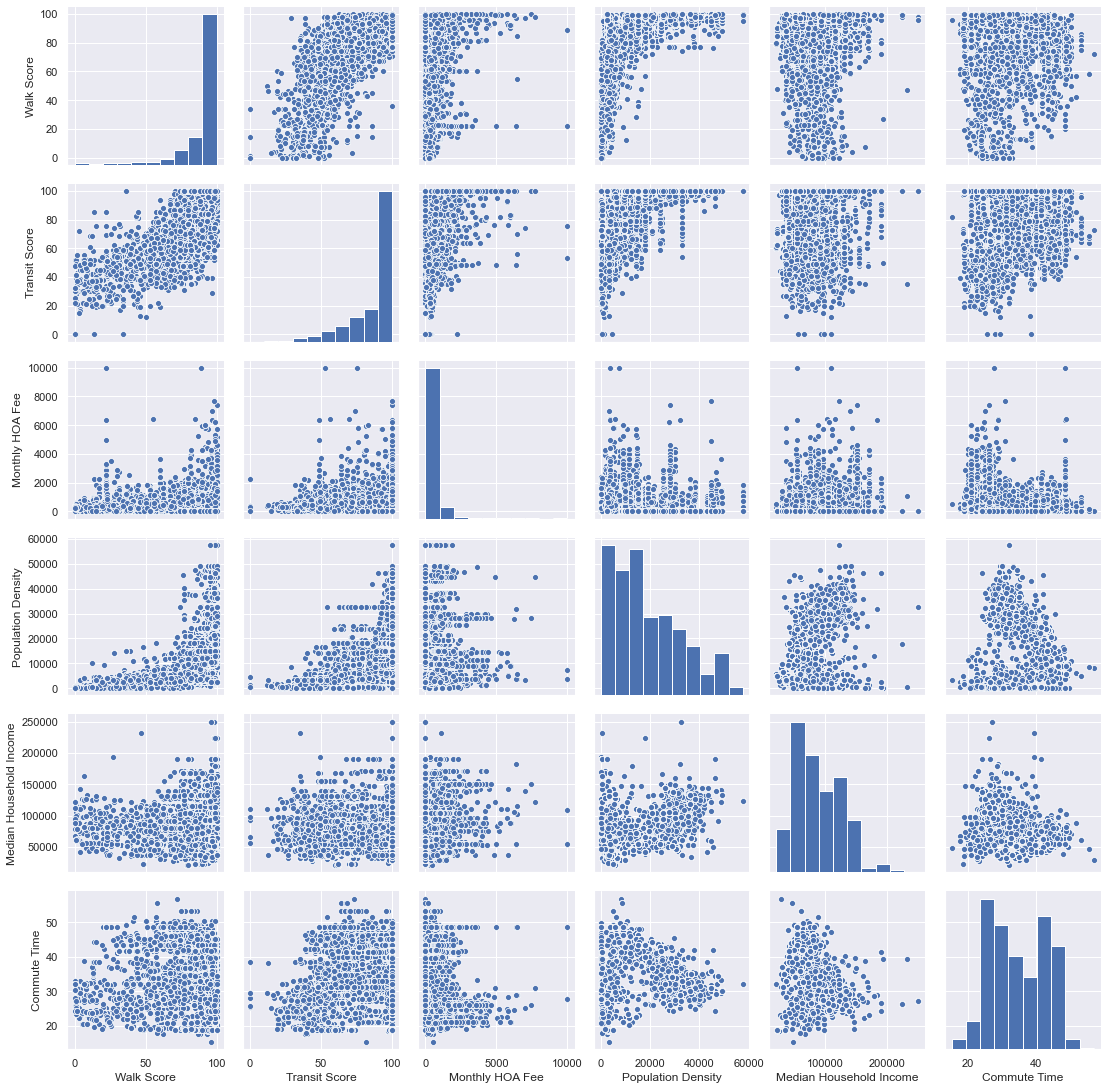

In [203]:
#Multivariate Analysis
sns.pairplot(df[numerical])
plt.show()

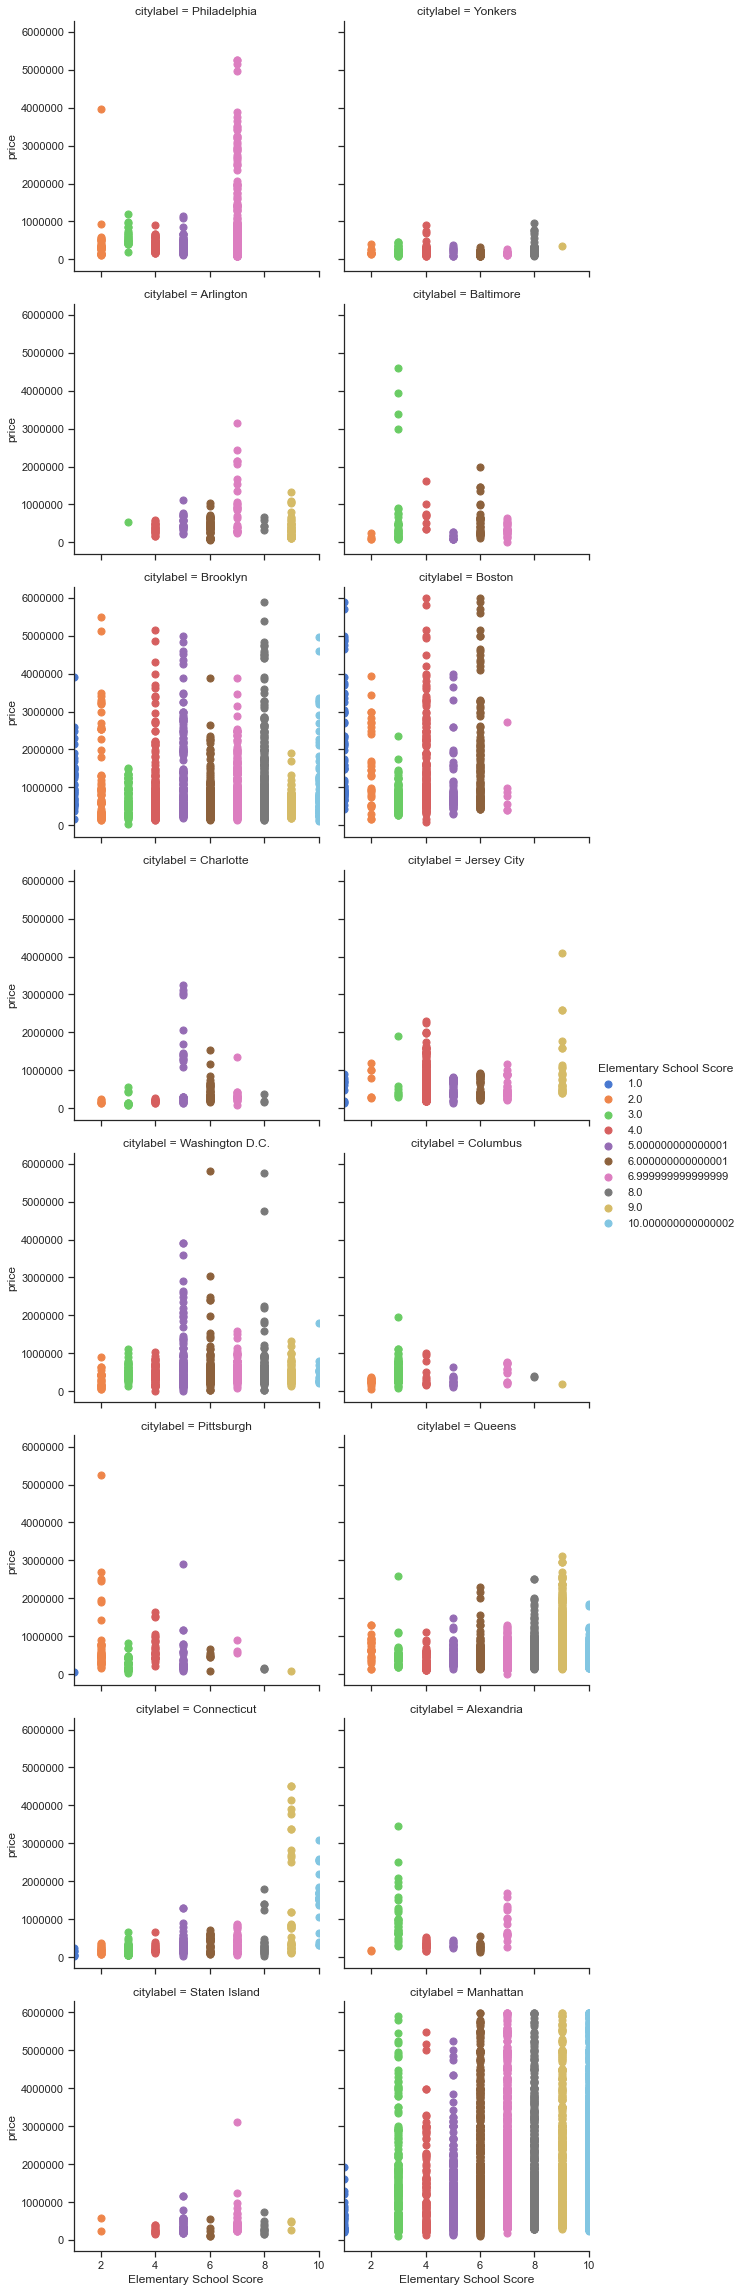

In [204]:
sns.set(style='ticks') 
sns.lmplot(x='Elementary School Score',y='price',col='citylabel',hue='Elementary School Score',
          data=df,col_wrap=2,ci=None,palette='muted',height=4,scatter_kws={"s":50,"alpha":1})
plt.ticklabel_format(style='plain', axis='y')
plt.show()